# COGS 108 - Final Project

# Overview

Amidst the current COVID-19 pandemic, public health is under intense scrutiny. However, COVID and other airborne illnesses are not the only threat to the public. Foodborne diseases cause approximately 128,000 hospitalizations and 3,000 deaths each year (Ibanez). Our frontline defenses against this are our health inspectors who bear the task of assessing the sanitation of our food service institutions. How can we help them perform consistent, quality inspections and safeguard public health?

# Name & GitHub

- Name: Kenji Sommers 
- PID: A13918055
- Github: Ksommers

# Research Question

Is there a relationship between an inspector's schedule and the scores they give restaurants?

# Background and Prior Work

The San Diego County’s Health Inspection website details pertinent information about inspection procedure. There are 3 types of inspection: routine, reinspection, and status verification. A routine inspection is a recurring, comprehensive inspection of a facility that produces a grade. A reinspection is a site visit to confirm compliance with a previous violation. A status verification simply is a visit that verifies continued operation or ownership change. During an assessment, the inspector notes each health violation and its corresponding severity. The violations are tallied and subtracted from 100. A score of 79 or less is a failing grade, however, this does not necessarily mean the restaurant will be forcibly shut down (SD Food Info).

Between the detailed oriented nature of their position and dealing with unsanitary conditions, a health inspector’s job is rigorous. Naturally, some wonder what biases these factors introduce when calculating health assessments. Management scientists Maria Ibanez and Michael Toffel explored this very idea in their research. They argue an inspector will document more violations after visiting a site with worse compliance levels and cite fewer violations if their site schedule is packed with appointments (Ibanez) References:

- 1) Ibanez, Maria R., and Michael W. Toffel. “How Scheduling Can Bias Quality Assessment: Evidence from Food-Safety Inspections.” Management Science, 8 July 2019, doi:10.1287/mnsc.2019.3318. https://www.hbs.edu/faculty/Publication%20Files/Ibanez_and_Toffel_2019_ManSci_AiA_inclSupplement_d24f2c0d-e451-4ff1-883b-138495d6a9a0.pdf

- 2) “SD Food Info.” San Diego County Environmental Health, San Diego County, www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html.

# Hypothesis

I hypothesize that the data will demonstrate a relationship between an inspector's schedule and the scores they give restaurants similar to the results of Ibanez and Toffel’s research. Inspectors are not infallible and are subject to variance and biases due to a number of factors. I think their schedule, especially if it contains a site with poor conditions, would influence them to document violations differently.

# Dataset(s)

For my investigation, I will use the provided inspections.csv file. The file contains 18,466 observations of restaurant health inspections. Each observation details the inspector, the inspection date, restaurant information, the restaurants previous inspection details, and the results of the current inspection. 
This data set provides all the necessary information I need to carry out my analysis. Since I want to measure an inspector's scores over time, I need the inspection scores, date, as well as the inspector ID. Furthermore, to see if they are influenced negatively by high violation restaurants, I need previous inspection information. All this information is contained within inspections.csv

# Setup

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

To clean the given inspections.csv data, I first identified the relevant columns of information and dropped all other columns. I narrowed it to these columns:

1. Inspector ID
2. Inspection date
3. Restaurant previous average non-critical violation counts
4. Restaurant previous average critical violation counts
5. Non-critical violation score of the current inspection
6. Critical violation score of the current inspection. 

From here, I dropped all observations with missing values. If an observation were missing any values in any of the remaining columns, I would not be able to analyze an inspector's grading standard over time and compare it to the typical amount of cleanliness at an establishment. Finally, I reformatted the date column's data to a time object so I could measure an inspector's grading standard over time. I exported this data into the csv file "Clean_Inspection". This file contains 15,420 observations. 

In [7]:
df_insp = pd.read_csv('Clean_Inspection')
df_insp

,Inspector ID,Inspection Date,Previous Mean Non-Critical,Previous Mean Critical,Non-Critical Violations,Critical Violations
0,1.0,2012-11-05 00:00:00+00:00,7.000000,8.000000,3,4
1,1.0,2012-11-19 00:00:00+00:00,4.000000,11.000000,7,5
2,10.0,2012-12-03 00:00:00+00:00,3.000000,1.000000,3,2
3,1.0,2012-12-04 00:00:00+00:00,7.000000,5.000000,0,1
4,1.0,2012-12-05 00:00:00+00:00,6.000000,3.000000,9,4
...,...,...,...,...,...,...
15415,25.0,2016-11-03 00:00:00+00:00,4.777778,1.000000,13,6
15416,1.0,2016-11-03 00:00:00+00:00,3.250000,0.750000,3,2
15417,26.0,2016-11-03 00:00:00+00:00,1.750000,0.875000,4,3
15418,23.0,2016-11-03 00:00:00+00:00,2.000000,1.111111,2,1


# Data Visualization

We can gain some basic insight into the distribution of the data across all categories by using the following method. 

In [14]:
df_insp.describe()

,Inspector ID,Previous Mean Non-Critical,Previous Mean Critical,Non-Critical Violations,Critical Violations
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,13.347406,5.538940,3.276347,5.115110,2.714721
std,9.023939,3.200543,2.319573,3.665365,2.788989
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,1.600000,2.000000,1.000000
50%,11.000000,5.000000,2.800000,4.000000,2.000000
75%,22.000000,7.250000,4.428571,7.000000,4.000000
max,30.000000,27.000000,23.000000,33.000000,23.000000


### Non-Critical Violation Distribution

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


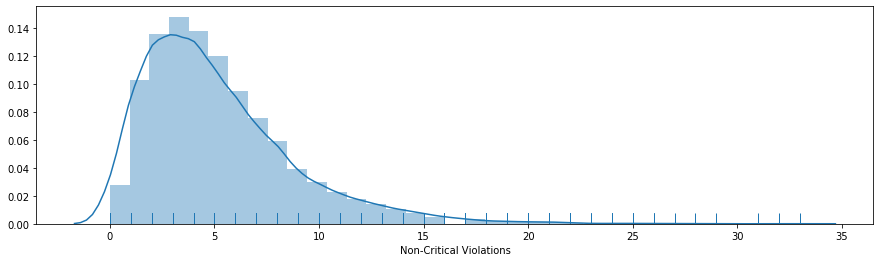

In [9]:
plt.figure(figsize=(15,4))
sns.distplot(df_insp['Non-Critical Violations'], bins=35, rug=True)

We observe that the Non-Critical Violation distribution is a normal distribution with a left skew. There are no outliers in the set.

### Critical Violation Distribution

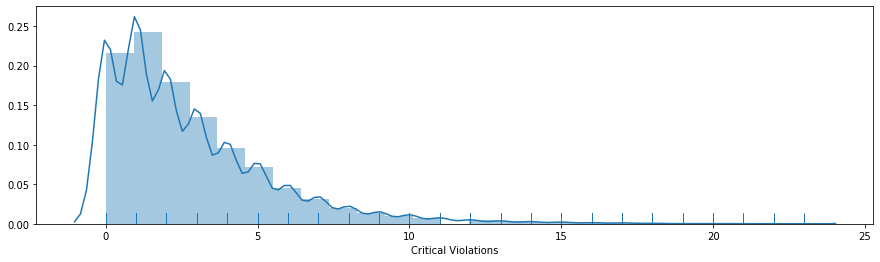

In [10]:
plt.figure(figsize=(15,4))
sns.distplot(df_insp['Critical Violations'], bins=25, rug=True)

We observe that the Critical Violation distribution is also a normal distribution with a left skew. There are no outliers in this set either.

# Data Analysis & Results

In [11]:
# Finds the average discrepancy between an inspector's critical violation score and the inspected 
# establishment's average critical violation score, given the inspector's previous inspection had
# an above average critical violation score
def crit_violation_discrepancy(df):
    # declare variables
    avg_critical = 2.714721
    discrepancy_sum = 0.0
    i = 1
    
    # Loop through dataframe starting at the second element
    while(i < df['Inspection Date'].size):
        
        # Get inspector's prev critical violation score
        prev_inspection = df.iloc[(i-1)]
        prev_critical = prev_inspection[5]
        
        # if prev above average, calculate discrepancy between current inspection crit violation 
        # count and prev avg crit violation score of restaurant
        if (prev_critical > avg_critical):
            cur_inspection = df.iloc[i]
            discrepancy_sum += cur_inspection[5] - cur_inspection[3]
            
        i = i + 1
            
    # return average discrepancy between inspector's critical violation count and the restaurant's 
    # previous average critical violations       
    return ( discrepancy_sum / df['Inspection Date'].size )

# Finds the average discrepancy between an inspector's non-critical violation score and the inspected 
# establishment's average non-critical violation score, given the inspector's previous inspection 
# had an above average critical violation score
def non_crit_violation_discrepancy(df):
    # declare variables
    avg_critical = 2.714721
    discrepancy_sum = 0.0
    i = 1
    
    # Loop through dataframe starting at the second element
    while(i < df['Inspection Date'].size):
        
        # Get inspector's prev critical violation score
        prev_inspection = df.iloc[(i-1)]
        prev_critical = prev_inspection[5]
        
        # if prev above average, calculate discrepancy between current inspection non-crit violation 
        # count and prev avg non-crit violation score of restaurant
        if (prev_critical > avg_critical):
            cur_inspection = df.iloc[i]
            discrepancy_sum += cur_inspection[4] - cur_inspection[2]
            
        i = i + 1
            
    # return average discrepancy between inspector's critical violation count and the restaurant's 
    # previous average critical violations       
    return ( discrepancy_sum / df['Inspection Date'].size )

Using the function above, we can calculate the average discrepancy between all inspector's critical violation score and the corresponding inspected establishment's average critical violation score and the average discrepancy between all inspector's non-critical violation score and the corresponding inspected establishment's average non-critical violation score.

In [12]:
index = 1
total_crit_discrepancies = 0.0
total_non_crit_discrepancies = 0.0

#Loop through all inspectors to find discrepancies
while(index <= df_insp['Inspector ID'].unique().size):
    inspector_career = df_insp[df_insp['Inspector ID'] == index]
    total_crit_discrepancies += crit_violation_discrepancy(inspector_career)
    total_non_crit_discrepancies += non_crit_violation_discrepancy(inspector_career)
    index = index + 1

avg_total_crit_discrepancies = total_crit_discrepancies / df_insp['Inspector ID'].unique().size
avg_total_non_crit_discrepancies = total_non_crit_discrepancies / df_insp['Inspector ID'].unique().size

avg_total_crit_discrepancies, avg_total_non_crit_discrepancies

(0.040433048015116414, 0.10208444121405034)

These results show that if an inspector's critical violation score on their previous inspection is greater than the average critical violation score, an inspector, on average, would find ~.04 more critical violations and ~.1 more non-critical violations on their next inspection. This shows that there is not a significant correlation here since the increase in violations is far smaller than even one standard deviation away in both the non-critical and critical violation values.

# Ethics & Privacy

This investigation adheres to the Safe Harbor Method of data privacy to preserve the anonymity of the involved individuals. To keep the inspectors anonymous, I used the inspector's unique, numerical ID to track their scores instead of their name. Furthermore, I omitted all location data from their inspections so that the audience cannot infer the inspector's identity based on the observed restaurants. Since the inspectors and the locations they inspected remained anonymous, the inspection date cannot be used as identifying information for the inspectors. The remaining data I did use (violation counts) does not need to be omitted or manipulated to adhere to Safe Harbor guidelines.

While the overall goal of this investigation is to improve the accuracy of health inspections and, consequently, public health, the implications of this study could impact both the inspectors and the public. Although my findings did not agree with my hypothesis, if poor food establishment conditions influence an inspector's grading severity, a restructuring of health inspector scheduling could come at the taxpayer's expense. An example of this would be hiring more inspectors to mitigate the influence poor conditions has on inspectors.

# Conclusion & Discussion

This investigation set out to find a relationship between a health inspector's schedule and the scores they give. I initially hypothesized that if an inspector visited a site with poor sanitary conditions, their next inspection would be graded more harshly. Upon analysis, I was not able to find a meaningful correlation between these two variables and concluded that inspectors typically give scores that reflect the establishment's sanitary conditions. This result indicates that health inspection scores are accurate even if an inspector must work in the dirtiest or dangerous establishments. 